In [1]:
#import necessary libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
#get the current working director
print(os.getcwd())

C:\Users\user\AppData\Local\bipy\27825500\projects\d6d26c318ca54ba1889739c4d871f692


In [3]:
#import the excel file as it is
rating_2015 = pd.read_excel('1. 2015 Source File.xlsx')
rating_2016 = pd.read_excel('2016 Ratings.xlsx')

In [4]:
#look at the shape of the file downloaded
rating_2015.shape
print(rating_2015.columns)
print(rating_2016.columns)

Index(['Ticker', 'EBIT%', 'ROC%', 'Rev / Assets', 'EBITDA Cov', 'EBIT Cov',
       'Debt to EBITDA', 'Debt to EBIT', 'EBIT / Debt', 'CFO / Debt',
       'FCF / Debt', 'D/E', 'Net D/E', 'L Debt / Capital', 'Debt / Capital',
       'D/A', 'Op Marg%', 'CF Coverage', 'S&P', 'Fitch', 'Moody', 'S&P #',
       'Fitch #', 'Moody #', 'Avg Credit', 'Credit Score', 'Credit Score Vl',
       'Country', 'Exch', 'Sector', 'Ind Grp', 'Industry', 'Sub-Ind'],
      dtype='object')
Index(['Ticker', 'S&P LT LC', 'Fitch Sr Unsec Dbt Rtg',
       'Moody's Sr Unsec Debt'],
      dtype='object')


In [5]:
#Numeric Scale 1
map= {'AAA': 0, 'AA+': 1, 'AA':2 , 'AA-':3 , 'A+': 4, 'A':5, 'A-': 6,  'BBB+':7 , 'BBB':8,'BBBpi':8 ,'BBB-':9,'BB+':10,'BB':11,'BBpi':11,'BB-':12,'B+':13,'B':14,'B-':15, 'CCC+': 16, 'CCC':17, 'CCC-':18, 'CC':19, 'D':20, 'NRpi':100,'NR':100, 'nan' :100, 'WD':100,'R':100}

In [6]:
#Numeric Scale 2
map_moodys= {'Aaa': 0, 'Aa1+': 1, 'Aa2':2 , 'Aa3':3 , 'A1': 4, 'A2':5, 'A3': 6,  'Baa1':7 , 'Baa2':8, 'Baa3':9,'Ba1':10,'Ba2':11, 'Ba3':12,'B1':13,'B2':14,'B3':15, 'Caa1': 16, 'Caa2':17, 'Caa3':18, 'Ca':19, 'C':19, 'WR':100,'NR':100, 'nan' :100, 'R':100}

In [7]:

rating_2015['SP_Score'] = rating_2015['S&P'].map(map)
rating_2016['SP_Score'] = rating_2016['S&P LT LC'].map(map)

In [8]:
rating_2015['Moodys_Score'] = rating_2015['Moody'].map(map_moodys)
rating_2016['Moodys_Score'] = rating_2016["Moody's Sr Unsec Debt"].map(map_moodys)

In [9]:
rating_2015['Fitch_Score'] = rating_2015['Fitch'].map(map)
rating_2016['Fitch_Score'] = rating_2016['Fitch Sr Unsec Dbt Rtg'].map(map)

In [10]:
df_2015 = rating_2015[['Ticker', 'EBIT%', 'ROC%', 'Rev / Assets', 'EBITDA Cov', 'EBIT Cov',
       'Debt to EBITDA', 'Debt to EBIT', 'EBIT / Debt', 'CFO / Debt',
       'FCF / Debt', 'D/E', 'Net D/E', 'L Debt / Capital', 'Debt / Capital',
       'D/A', 'Op Marg%', 'CF Coverage', 'SP_Score', 'Fitch_Score', 'Moodys_Score',
       'Country', 'Exch', 'Sector', 'Ind Grp', 'Industry', 'Sub-Ind']]

Main rating Frame

In [11]:
#2015 data plus 2016 rating
rating_main = pd.merge(df_2015, rating_2016[['Ticker','SP_Score','Fitch_Score','Moodys_Score']], left_on='Ticker', right_on = 'Ticker', how='left')

In [12]:
rating_main.isnull().sum()

Ticker                 0
EBIT%               1103
ROC%                 422
Rev / Assets          94
EBITDA Cov          1034
EBIT Cov            1130
Debt to EBITDA      1032
Debt to EBIT         580
EBIT / Debt          863
CFO / Debt           367
FCF / Debt           223
D/E                  347
Net D/E              228
L Debt / Capital     278
Debt / Capital       210
D/A                  189
Op Marg%             113
CF Coverage         1136
SP_Score_x           331
Fitch_Score_x       2690
Moodys_Score_x      1907
Country                0
Exch                   0
Sector               166
Ind Grp              166
Industry             166
Sub-Ind              166
SP_Score_y           538
Fitch_Score_y       2722
Moodys_Score_y      2011
dtype: int64

In [13]:
def fill_na(df):
    list_of_cols = df.isnull().sum()[df.isnull().sum() != 0].index.to_list
    for x in list_of_cols():
        df[x]  = df[x].fillna(df[x].mode()[0])

In [14]:
fill_na(rating_main)

<AxesSubplot:>

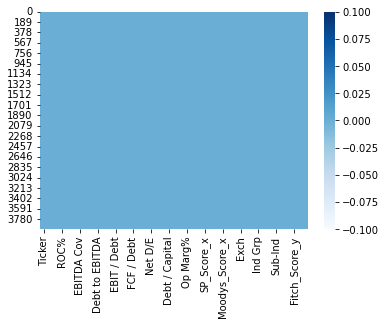

In [15]:
sns.heatmap(rating_main.isnull(),cmap='Blues')

In [16]:
rating_main.columns

Index(['Ticker', 'EBIT%', 'ROC%', 'Rev / Assets', 'EBITDA Cov', 'EBIT Cov',
       'Debt to EBITDA', 'Debt to EBIT', 'EBIT / Debt', 'CFO / Debt',
       'FCF / Debt', 'D/E', 'Net D/E', 'L Debt / Capital', 'Debt / Capital',
       'D/A', 'Op Marg%', 'CF Coverage', 'SP_Score_x', 'Fitch_Score_x',
       'Moodys_Score_x', 'Country', 'Exch', 'Sector', 'Ind Grp', 'Industry',
       'Sub-Ind', 'SP_Score_y', 'Fitch_Score_y', 'Moodys_Score_y'],
      dtype='object')

In [17]:
df_BBB_neg = df_2015.loc[(df_2015['SP_Score']==9) |  (df_2015['Moodys_Score']==9) |  (df_2015['Fitch_Score']==9)]

In [18]:
df_BBB_neg.isna().sum()/len(df_BBB_neg) *100

Ticker               0.000000
EBIT%               31.063830
ROC%                 5.531915
Rev / Assets         1.063830
EBITDA Cov          20.638298
EBIT Cov            25.957447
Debt to EBITDA      19.787234
Debt to EBIT         5.319149
EBIT / Debt         21.489362
CFO / Debt           8.723404
FCF / Debt           1.063830
D/E                  1.702128
Net D/E              1.702128
L Debt / Capital     1.702128
Debt / Capital       1.063830
D/A                  0.851064
Op Marg%             0.851064
CF Coverage         26.382979
SP_Score             5.957447
Fitch_Score         44.255319
Moodys_Score        37.872340
Country              0.000000
Exch                 0.000000
Sector               0.851064
Ind Grp              0.851064
Industry             0.851064
Sub-Ind              0.851064
dtype: float64

In [19]:
fill_na(df_BBB_neg)

C:\blp\bqnt\environments\bqnt-3\lib\site-packages\bqnb\kernelapp.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # provided solely under the terms of the BFLP license agreement.


<AxesSubplot:>

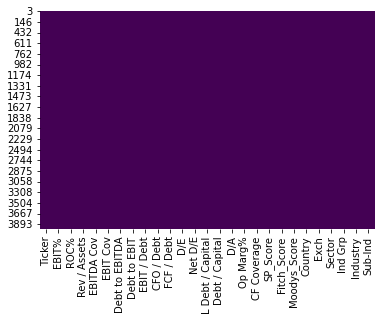

In [20]:
sns.heatmap(df_BBB_neg.isnull(), cbar=False, cmap ='viridis')

In [21]:
list_of_cols = df_BBB_neg.isnull().sum()[df_BBB_neg.isnull().sum() != 0].index.to_list

In [22]:
print(list_of_cols)

<bound method IndexOpsMixin.tolist of Index([], dtype='object')>


In [23]:
df_BBB_main = pd.merge(df_BBB_neg, rating_2016[['Ticker','SP_Score']], left_on='Ticker', right_on='Ticker', how='left')

In [24]:
print(df_BBB_main.head(5))
df_BBB_main.columns

            Ticker      EBIT%       ROC%  Rev / Assets  EBITDA Cov   EBIT Cov  \
0    A2A IM Equity   7.603445  -0.483626      0.460757    4.957055   2.220859   
1  ABCB4 BZ Equity -43.524463   4.582557      0.116523   -5.666667 -14.861420   
2     AC FP Equity  11.037770 -35.817242      0.622958   17.692308  11.576923   
3    ACE IM Equity  12.676457   5.115155      0.424153    5.251785   3.393250   
4   8572 JP Equity -43.524463   1.663501      0.182295    1.979966 -14.861420   

   Debt to EBITDA  Debt to EBIT  EBIT / Debt  CFO / Debt  ...  SP_Score_x  \
0        5.019802     11.204420     0.089250    0.202663  ...         8.0   
1        0.003947      1.152017    -0.499101   -6.365581  ...        10.0   
2        3.115217      4.760797     0.210049    0.240754  ...         9.0   
3        5.616943      8.693428     0.115029    0.161802  ...         9.0   
4       16.771809     45.215083     0.022117    0.004056  ...         9.0   

   Fitch_Score  Moodys_Score  Country  \
0        

Index(['Ticker', 'EBIT%', 'ROC%', 'Rev / Assets', 'EBITDA Cov', 'EBIT Cov',
       'Debt to EBITDA', 'Debt to EBIT', 'EBIT / Debt', 'CFO / Debt',
       'FCF / Debt', 'D/E', 'Net D/E', 'L Debt / Capital', 'Debt / Capital',
       'D/A', 'Op Marg%', 'CF Coverage', 'SP_Score_x', 'Fitch_Score',
       'Moodys_Score', 'Country', 'Exch', 'Sector', 'Ind Grp', 'Industry',
       'Sub-Ind', 'SP_Score_y'],
      dtype='object')

<AxesSubplot:>

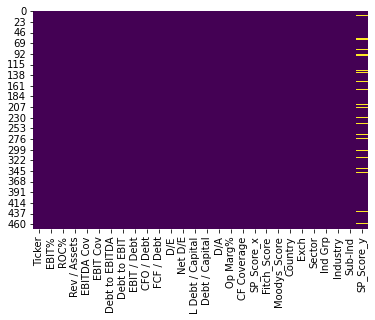

In [25]:
sns.heatmap(df_BBB_main.isnull(), cbar=False, cmap ='viridis')

In [26]:
#drop anything with less than 1%
df_BBB_main = df_BBB_main.dropna(subset=['SP_Score_y'],axis=0)

<AxesSubplot:>

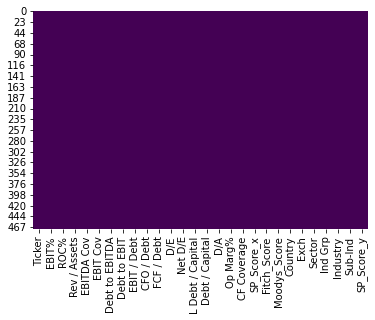

In [27]:
sns.heatmap(df_BBB_main.isnull(), cbar=False, cmap ='viridis')

In [28]:
df_BBB_main['Downgrade'] = df_BBB_main['SP_Score_x']-df_BBB_main['SP_Score_y']

In [29]:
df_BBB_main['Downgrade_Binary'] = [1 if x < 0 else 0 for x in df_BBB_main['Downgrade'] ]

In [30]:
X = df_BBB_main[['EBIT%', 'ROC%', 'Rev / Assets', 'EBITDA Cov', 'EBIT Cov',
       'Debt to EBITDA', 'Debt to EBIT', 'EBIT / Debt', 'CFO / Debt',
       'FCF / Debt', 'D/E', 'Net D/E', 'L Debt / Capital', 'Debt / Capital',
       'D/A', 'Op Marg%', 'CF Coverage','Country', 'Exch', 'Sector', 'Ind Grp', 'Industry',
       'Sub-Ind']]
y = df_BBB_main['Downgrade_Binary']

In [31]:
X = pd.get_dummies(X, columns = ['Country', 'Exch', 'Sector', 'Ind Grp', 'Industry',
       'Sub-Ind'], drop_first=True)


In [32]:
X.dtypes

EBIT%                                          float64
ROC%                                           float64
Rev / Assets                                   float64
EBITDA Cov                                     float64
EBIT Cov                                       float64
                                                ...   
Sub-Ind_Tobacco                                  uint8
Sub-Ind_Trading Companies & Distributors         uint8
Sub-Ind_Trucking                                 uint8
Sub-Ind_Water Utilities                          uint8
Sub-Ind_Wireless Telecommunication Services      uint8
Length: 261, dtype: object

In [33]:
cont_list = X.select_dtypes(include=['float64']).columns

In [34]:
# print(cont_list)

# def eda(df, column):
#     df[column + '_Quar'] = pd.cut(df[column],4,labels=['1','2','3','4'])

# for i in range(0,len(cont_list)):
#     eda(X,cont_list[i])

In [35]:
X.columns

Index(['EBIT%', 'ROC%', 'Rev / Assets', 'EBITDA Cov', 'EBIT Cov',
       'Debt to EBITDA', 'Debt to EBIT', 'EBIT / Debt', 'CFO / Debt',
       'FCF / Debt',
       ...
       'Sub-Ind_Specialty Stores', 'Sub-Ind_Steel',
       'Sub-Ind_Technology Distributors',
       'Sub-Ind_Technology Hardware, Storage & Peripherals',
       'Sub-Ind_Thrifts & Mortgage Finance', 'Sub-Ind_Tobacco',
       'Sub-Ind_Trading Companies & Distributors', 'Sub-Ind_Trucking',
       'Sub-Ind_Water Utilities',
       'Sub-Ind_Wireless Telecommunication Services'],
      dtype='object', length=261)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42, stratify = y)

In [37]:
print(y_test.value_counts())

0    120
1     20
Name: Downgrade_Binary, dtype: int64


In [38]:
y.value_counts(normalize=True)

0    0.855792
1    0.144208
Name: Downgrade_Binary, dtype: float64

In [39]:
Train = pd.concat([X_train, y_train], axis=1)
print(Train.shape)

(283, 262)


In [40]:
print(X_train.shape)

(283, 261)


In [41]:
class0 = Train[Train['Downgrade_Binary']==0]
class1 = Train[Train['Downgrade_Binary']==1]

In [42]:
class0['Downgrade_Binary'].value_counts()

0    242
Name: Downgrade_Binary, dtype: int64

In [43]:
class1['Downgrade_Binary'].value_counts()

1    41
Name: Downgrade_Binary, dtype: int64

In [44]:
class1_over = class1.sample(242,replace=True)
Train_sampled = pd.concat([class1_over, class0], axis=0)
Y_Train_S = Train_sampled['Downgrade_Binary']
X_Train_S = Train_sampled.drop('Downgrade_Binary', axis=1)

In [45]:
Train_sampled['Downgrade_Binary'].value_counts()

1    242
0    242
Name: Downgrade_Binary, dtype: int64

In [46]:
Scale = MinMaxScaler()
poly = PolynomialFeatures()
Log = LogisticRegression(C=0.05,max_iter=4000)
Rg = RandomForestClassifier()

0.75
0.7571428571428571


<AxesSubplot:>

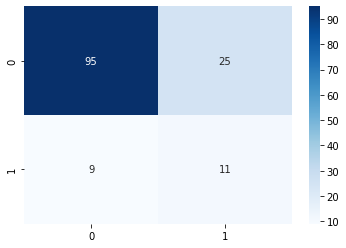

In [47]:
Log.fit(X_Train_S, Y_Train_S)
print(Log.score(X_Train_S, Y_Train_S))
print(Log.score(X_test, y_test))



y_pred = Log.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

C:\blp\bqnt\environments\bqnt-3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


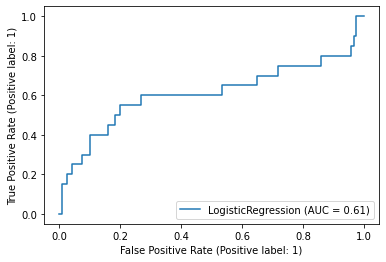

In [48]:
plot_roc_curve(Log, X_test,y_test)

In [49]:
from sklearn.decomposition import PCA
pca = PCA()

In [50]:
X_Train_PCA = pca.fit_transform(X_Train_S)
X_test_PCA = pca.transform(X_test)

0.75
0.7571428571428571


<AxesSubplot:>

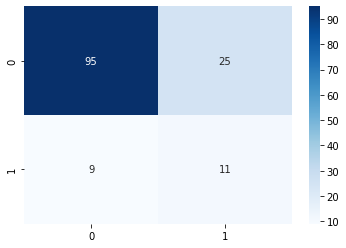

In [51]:
Log.fit(X_Train_PCA, Y_Train_S)
print(Log.score(X_Train_PCA, Y_Train_S))
print(Log.score(X_test_PCA, y_test))

y_pred = Log.predict(X_test_PCA)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

C:\blp\bqnt\environments\bqnt-3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


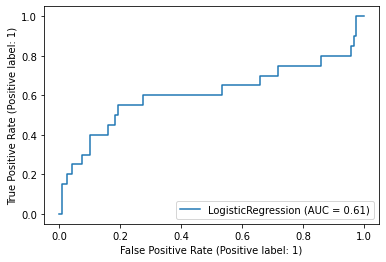

In [52]:
plot_roc_curve(Log, X_test_PCA,y_test)

In [ ]:
grid = {"C": np.logspace(-3,3,7,10,21), "penalty":['l1','l2']}
logreg= LogisticRegression(max_iter=10000)
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_Train_PCA, Y_Train_S)

In [ ]:
print(logreg_cv.best_params_)
print('accuracy:', logreg_cv.best_score_)
y_pred = logreg_cv.predict(X_test_PCA)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

In [72]:
svc = SVC(probability=True,kernel='poly')

<AxesSubplot:>

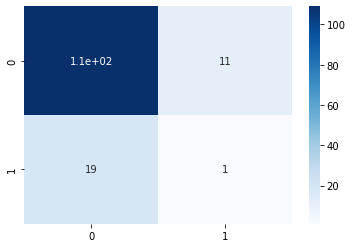

In [73]:
svc.fit(X_Train_S, Y_Train_S)
y_pred = svc.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

C:\blp\bqnt\environments\bqnt-3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


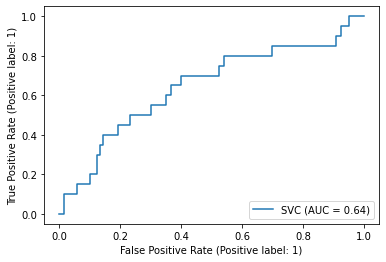

In [57]:
plot_roc_curve(svc, X_test,y_test)

C:\blp\bqnt\environments\bqnt-3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       120
           1       0.24      0.30      0.27        20

    accuracy                           0.76       140
   macro avg       0.56      0.57      0.56       140
weighted avg       0.79      0.76      0.77       140



<AxesSubplot:>

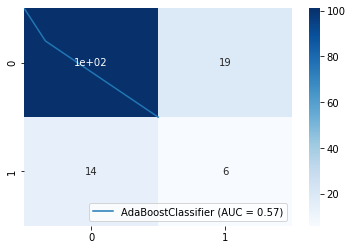

In [58]:
clf = DecisionTreeClassifier(random_state=42)

AdaModel = AdaBoostClassifier(n_estimators=200, base_estimator= clf,learning_rate = 1)

AdaModel.fit(X_Train_S, Y_Train_S)
y_pred = AdaModel.predict(X_test)
plot_roc_curve(AdaModel, X_test,y_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

In [59]:
import numpy as np
a = np.linspace(0.1,10,20)
params = {
    'n_estimators': [100,150,200,300,400],
    'learning_rate' : [0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2]
}
adacv = GridSearchCV(AdaModel,param_grid=params, cv=5)



0.9152061855670102
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       120
           1       0.24      0.30      0.27        20

    accuracy                           0.76       140
   macro avg       0.56      0.57      0.56       140
weighted avg       0.79      0.76      0.77       140



<AxesSubplot:>

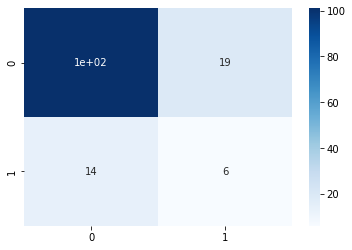

In [60]:
adacv.fit(X_Train_S, Y_Train_S)
print(adacv.best_score_)
y_pred = adacv.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')


In [61]:
from sklearn.ensemble import RandomForestClassifier
Rg= RandomForestClassifier()

0.9751932989690723
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       120
           1       0.33      0.05      0.09        20

    accuracy                           0.85       140
   macro avg       0.60      0.52      0.50       140
weighted avg       0.79      0.85      0.80       140



C:\blp\bqnt\environments\bqnt-3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


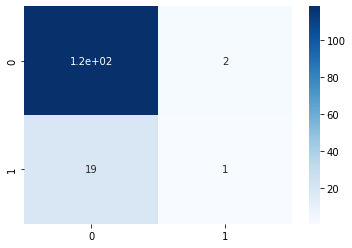

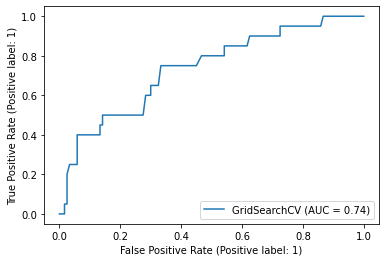

In [62]:
Rg= RandomForestClassifier()
Rg_params = {
    'n_estimators': [100,150,200,300,400],
    'max_depth' : [None, 1,2,3,4,5]
}
gs = GridSearchCV(Rg,param_grid=Rg_params, cv=5)
gs.fit(X_Train_S, Y_Train_S)
print(gs.best_score_)

y_pred = gs.predict(X_test)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

plot_roc_curve(gs, X_test,y_test)

In [63]:
#Trying Random forest

In [64]:
Rg_params = {
    'n_estimators': [100,150,200,300,400],
    'max_depth' : [None, 1,2,3,4,5]
}

In [65]:
gs = GridSearchCV(Rg,param_grid=Rg_params, cv=5)

In [66]:
gs.fit(X_Train_S, Y_Train_S)
print(gs.best_score_)

0.9731529209621993


In [67]:
y_pred = gs.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       120
           1       0.33      0.05      0.09        20

    accuracy                           0.85       140
   macro avg       0.60      0.52      0.50       140
weighted avg       0.79      0.85      0.80       140



<AxesSubplot:>

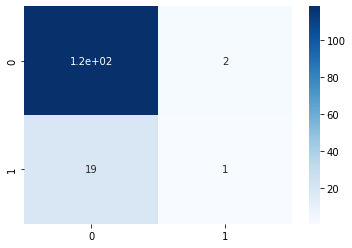

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

C:\blp\bqnt\environments\bqnt-3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


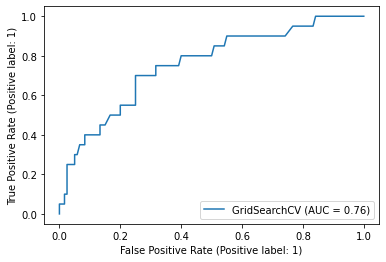

In [69]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs, X_test,y_test)